In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from utils import (
    ESP32CSIMultiTaskModel,
    train_esp32_multitask_model,
    plot_training_results,
    visualize_predictions,
    preprocess_esp32_csi,
    run_predictions
)

In [2]:
filename = "cleaned_merged_labelled_dataset.csv"

In [3]:
df = pd.read_csv(filename)
print("DataFrame head:")
print(df.head())

DataFrame head:
                                            CSI_DATA  locationX  locationY  \
0  [28 -64 1 0 0 0 0 0 0 0 0 0 9 -23 9 -22 10 -23...          0          1   
1  [-99 -48 9 0 0 0 0 0 0 0 0 0 15 18 14 18 15 19...          0          1   
2  [-121 112 8 0 0 0 0 0 0 0 0 0 -1 19 -1 19 -1 2...          0          1   
3  [-121 112 8 0 0 0 0 0 0 0 0 0 19 14 18 15 19 1...          0          1   
4  [-122 -31 23 0 0 0 0 0 0 0 0 0 -6 17 -7 18 -7 ...          0          1   

   state  
0      1  
1      1  
2      1  
3      1  
4      1  


In [4]:
# train model
model, history = train_esp32_multitask_model(
    csv_file=filename,
    input_shape=(128, 50),  # 128 subcarriers, 50 samples per window
    epochs=25,
    batch_size=16
)

Epoch 1/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - location_location_mae: 1.4347 - location_loss: 4.2071 - loss: 3.7123 - presence_accuracy: 0.5207 - presence_loss: 1.5961 - val_location_location_mae: 1.2527 - val_location_loss: 1.7955 - val_loss: 1.5561 - val_presence_accuracy: 0.5429 - val_presence_loss: 0.6931 - learning_rate: 5.0000e-04
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - location_location_mae: 0.3616 - location_loss: 0.1895 - loss: 0.7883 - presence_accuracy: 0.3917 - presence_loss: 0.6932 - val_location_location_mae: 0.7346 - val_location_loss: 0.6755 - val_loss: 1.0253 - val_presence_accuracy: 0.5429 - val_presence_loss: 0.6931 - learning_rate: 5.0000e-04
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - location_location_mae: 0.2560 - location_loss: 0.1006 - loss: 0.7435 - presence_accuracy: 0.4603 - presence_loss: 0.6932 - val_location_location_mae: 0.9922 - val_location_loss: 1.2845 - val_loss: 1.3299 - val_presence_accuracy: 0.5429 - val_presence_loss: 0.6931

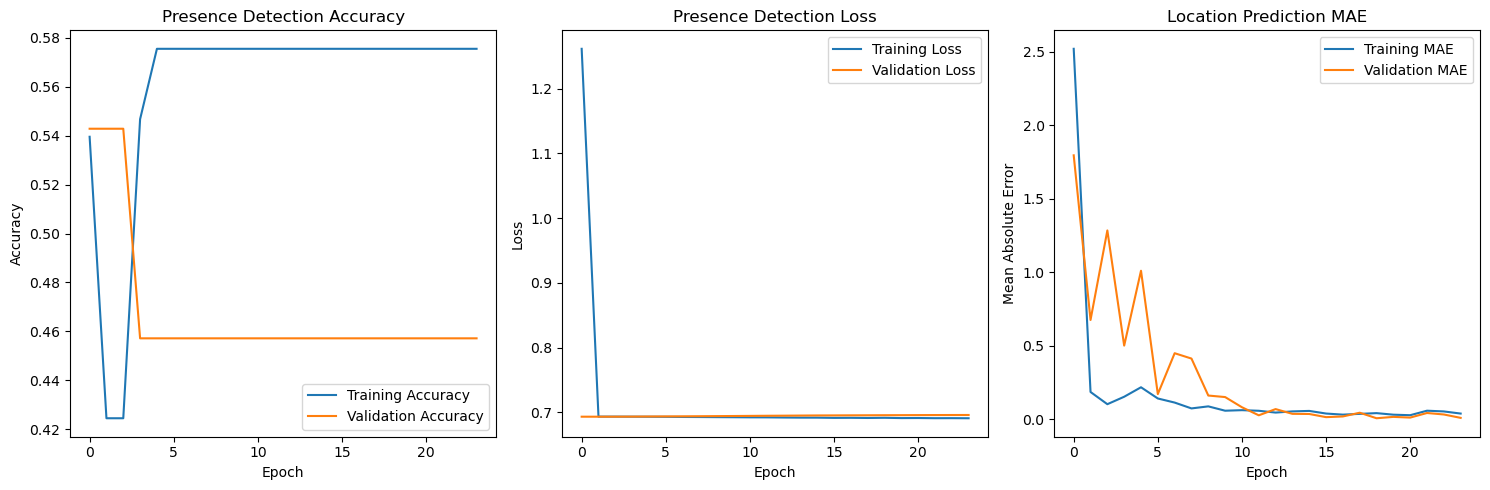

In [5]:
# visualize data
plot_training_results(history)

In [6]:
# SAVE WEIGHTS
model.model.save('weights/weights_v15.h5')

In [8]:
metrics = run_predictions('weights/weights_v15.h5', 'cleaned_merged_labelled_dataset.csv')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

Detailed results for first 5 samples:

Sample 1:
Presence: True=1, Predicted=0
Location: True=(0.0, 1.0), Predicted=(0.1, 0.9)

Sample 2:
Presence: True=1, Predicted=0
Location: True=(0.0, 1.0), Predicted=(-0.1, 1.0)

Sample 3:
Presence: True=1, Predicted=0
Location: True=(0.0, 1.0), Predicted=(-0.1, 0.9)

Sample 4:
Presence: True=1, Predicted=0
Location: True=(0.0, 1.0), Predicted=(-0.1, 1.0)

Sample 5:
Presence: True=1, Predicted=0
Location: True=(0.0, 1.0), Predicted=(-0.1, 1.0)

Overall Metrics:
Presence Detection Accuracy: 0.55
Location Mean Absolute Error: 0.08
Number of samples evaluated: 174
